In [1]:
from skimage import io  
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np 
from skimage.filters.rank import entropy 
from skimage.morphology import disk 
from skimage.color import rgb2gray 

In [2]:
imageNames = os.listdir("QL Folder")
imageNames
for i in range(len(imageNames)):
    imageNames[i] = 'QL Folder\\'+imageNames[i]
imageNames

['QL Folder\\.ipynb_checkpoints',
 'QL Folder\\2017-05-10.jpg',
 'QL Folder\\2018-07-19.jpg',
 'QL Folder\\2019-04-20.jpg',
 'QL Folder\\2019-07-04.jpg',
 'QL Folder\\2020-04-09.jpg',
 'QL Folder\\2020-11-15.jpg',
 'QL Folder\\2021-03-05.jpg',
 'QL Folder\\2021-09-01.jpg']

#Testing
image = io.imread(imageNames[3])
plt.imshow(image)
plt.show()
discSize = 20
gray_image = rgb2gray(image) 
entropy_image = entropy(gray_image, disk(discSize)) 
plt.imshow(entropy_image)
plt.show()
val = 1
img_black = (entropy_image > val)
plt.imshow(img_black, cmap='gray')
plt.show()
print(img_black)
total = 0
for i in img_black:
    for j in i:
        if j:
            total += 1
print("% Offset due to image cutoff:", 1-(total/len(img_black)/len(img_black[0])))

['QL Folder\\2017-05-10.jpg', 'QL Folder\\2018-07-19.jpg', 'QL Folder\\2019-04-20.jpg', 'QL Folder\\2019-07-04.jpg', 'QL Folder\\2020-04-09.jpg', 'QL Folder\\2020-11-15.jpg', 'QL Folder\\2021-03-05.jpg', 'QL Folder\\2021-09-01.jpg']
QL Folder\2017-05-10.jpg


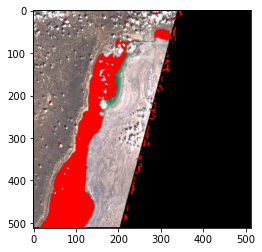

QL Folder\2018-07-19.jpg


QL Folder\2019-04-20.jpg


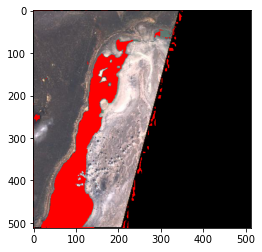

QL Folder\2019-07-04.jpg


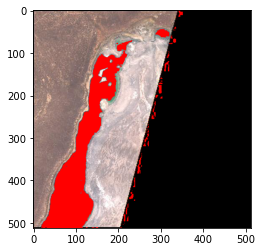

QL Folder\2020-04-09.jpg


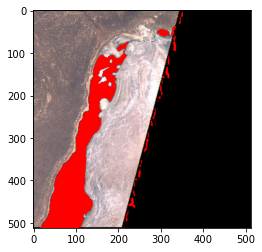

QL Folder\2020-11-15.jpg


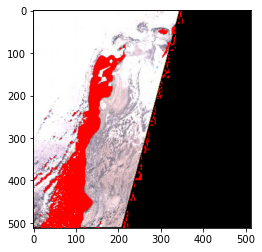

QL Folder\2021-03-05.jpg


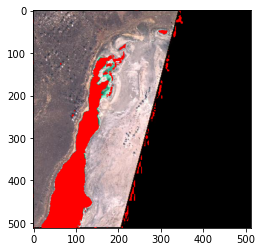

QL Folder\2021-09-01.jpg


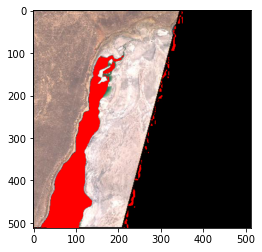

In [6]:
#Find blue pixels
blues = []
print(imageNames[1:])
for name in imageNames[1:]:
    bluescount = 0
    print(name)
    im = io.imread(name)
    imCopy = im[:]
    for i in range(len(imCopy)):
        for j in range(len(imCopy[0])):
            if ((imCopy[i][j][0] < imCopy[i][j][2]/1.25 and imCopy[i][j][1] < imCopy[i][j][2]) or (imCopy[i][j][0] < imCopy[i][j][2]/1.25 and imCopy[i][j][1] - 20 < imCopy[i][j][2])):
                imCopy[i][j] = [255, 0, 0]
                bluescount += 1
    plt.imshow(imCopy)
    blues.append(bluescount)
    #plt.savefig('Exports\\' + name[10:])
    plt.show()
    
        

[27243, 27964, 26936, 25989, 24850, 24307, 21579, 21383]


<ipython-input-28-d215271bf129>:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


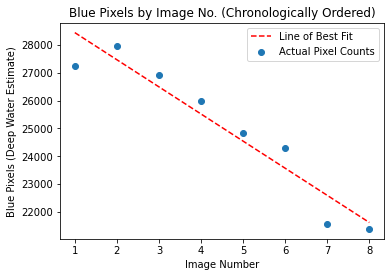

In [28]:
print(blues)
x = np.arange(1, 9)

fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.75,0.75])

plt.title("Blue Pixels by Image No. (Chronologically Ordered)")
plt.xlabel("Image Number")
plt.ylabel("Blue Pixels (Deep Water Estimate)")
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, blues, 1))(np.unique(x)), 'r--', label='Line of Best Fit')
plt.scatter(x, blues, label='Actual Pixel Counts')
plt.legend()
plt.savefig('Exports\\' + 'plot')